In [1]:
import librosa

data, sampling_rate = librosa.load('E:/#1 DATA SCIENCE/#4 Deep Learning/Projects/Speech Emotion Detection/Features/Actor_01/03-01-01-01-01-01-01.wav')

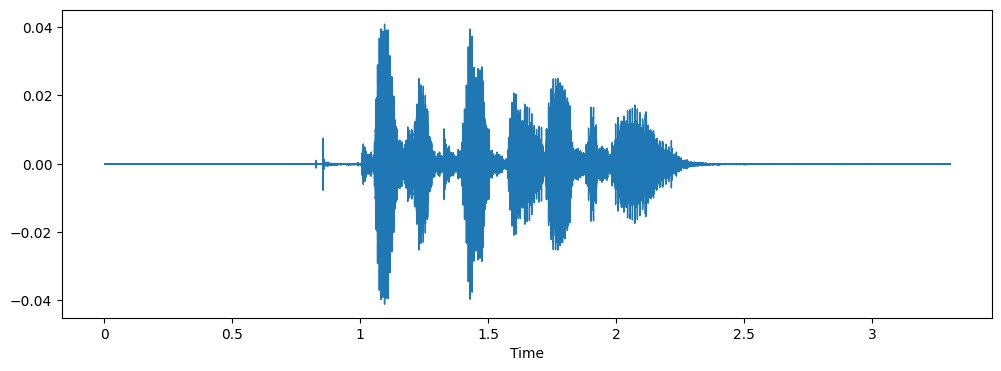

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

# Loading the Dataset stored as joblib file

In [3]:
import joblib
X = joblib.load('E:/#1 DATA SCIENCE/#4 Deep Learning/Projects/Speech Emotion Detection/Job_Lib Features/X.joblib')
y = joblib.load('E:/#1 DATA SCIENCE/#4 Deep Learning/Projects/Speech Emotion Detection/Job_Lib Features/y.joblib')

# Splitting the Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### np.expand_dims function is used to add a new axis to the arrays X_train and X_test. It is commonly used when working with deep learning models, especially with Convolutional Neural Networks (CNNs), which require input data in a specific format.

In [5]:

import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [6]:
x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1734, 40, 1))

In [7]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model

In [8]:
model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=205, validation_data=(x_testcnn, y_test))

Epoch 1/205
220/220 [==============================] - 3s 8ms/step - loss: 3.6572 - accuracy: 0.1865 - val_loss: 1.7043 - val_accuracy: 0.4100
Epoch 2/205
220/220 [==============================] - 1s 7ms/step - loss: 2.3305 - accuracy: 0.3221 - val_loss: 1.4814 - val_accuracy: 0.4844
Epoch 3/205
220/220 [==============================] - 2s 7ms/step - loss: 1.8596 - accuracy: 0.3960 - val_loss: 1.3286 - val_accuracy: 0.5248
Epoch 4/205
220/220 [==============================] - 2s 7ms/step - loss: 1.5859 - accuracy: 0.4687 - val_loss: 1.2942 - val_accuracy: 0.5623
Epoch 5/205
220/220 [==============================] - 2s 7ms/step - loss: 1.4533 - accuracy: 0.5199 - val_loss: 1.1866 - val_accuracy: 0.5790
Epoch 6/205
220/220 [==============================] - 2s 8ms/step - loss: 1.3338 - accuracy: 0.5520 - val_loss: 1.1298 - val_accuracy: 0.6044
Epoch 7/205
220/220 [==============================] - 2s 8ms/step - loss: 1.2397 - accuracy: 0.5765 - val_loss: 1.0774 - val_accuracy: 0.6055

Epoch 58/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5797 - accuracy: 0.7854 - val_loss: 0.5710 - val_accuracy: 0.7912
Epoch 59/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5815 - accuracy: 0.7868 - val_loss: 0.5694 - val_accuracy: 0.7918
Epoch 60/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5682 - accuracy: 0.7925 - val_loss: 0.5705 - val_accuracy: 0.8016
Epoch 61/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5739 - accuracy: 0.7848 - val_loss: 0.5873 - val_accuracy: 0.7889
Epoch 62/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5698 - accuracy: 0.7916 - val_loss: 0.5777 - val_accuracy: 0.7826
Epoch 63/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5665 - accuracy: 0.7908 - val_loss: 0.5663 - val_accuracy: 0.7866
Epoch 64/205
220/220 [==============================] - 2s 8ms/step - loss: 0.5538 - accuracy: 0.7996 - val_loss: 0.5785 - val_accuracy:

Epoch 115/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4230 - accuracy: 0.8420 - val_loss: 0.4753 - val_accuracy: 0.8264
Epoch 116/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4132 - accuracy: 0.8454 - val_loss: 0.4753 - val_accuracy: 0.8241
Epoch 117/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4101 - accuracy: 0.8479 - val_loss: 0.4728 - val_accuracy: 0.8206
Epoch 118/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4158 - accuracy: 0.8439 - val_loss: 0.4725 - val_accuracy: 0.8253
Epoch 119/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4019 - accuracy: 0.8579 - val_loss: 0.4722 - val_accuracy: 0.8195
Epoch 120/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4079 - accuracy: 0.8528 - val_loss: 0.4594 - val_accuracy: 0.8281
Epoch 121/205
220/220 [==============================] - 2s 9ms/step - loss: 0.4032 - accuracy: 0.8547 - val_loss: 0.4718 - val_ac

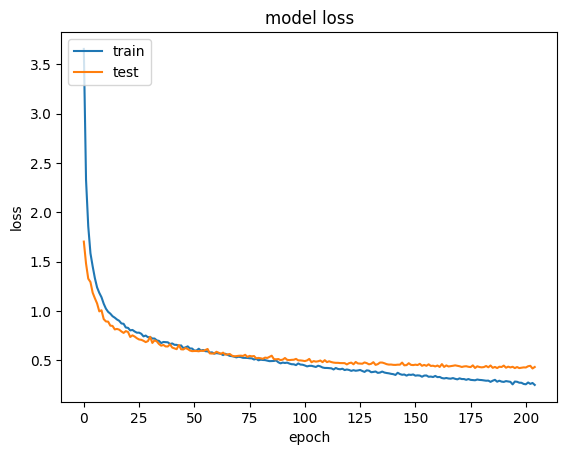

In [12]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

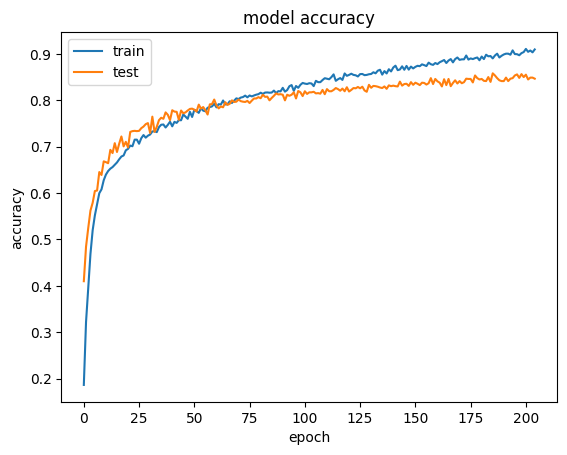

In [13]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
predictions = model.predict(x_testcnn)

55/55 [==============================] - 0s 3ms/step


In [15]:
predictions = np.argmax(predictions, axis=1)

In [16]:
y_test

array([3, 3, 3, ..., 1, 6, 2])

In [17]:
predictions

array([3, 3, 3, ..., 1, 6, 2], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       192
           1       0.70      0.83      0.76       123
           2       0.83      0.84      0.83       264
           3       0.90      0.78      0.84       275
           4       0.89      0.89      0.89       252
           5       0.78      0.87      0.82       241
           6       0.85      0.83      0.84       197
           7       0.88      0.85      0.87       190

    accuracy                           0.85      1734
   macro avg       0.84      0.85      0.84      1734
weighted avg       0.85      0.85      0.85      1734



In [21]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[171  10   1   5   1   1   1   2]
 [  6 102   9   1   0   4   1   0]
 [  0  13 222   1   7  13   5   3]
 [  6  10   9 215   3  22   5   5]
 [  0   1   7   3 224   8   7   2]
 [  1   1   8  13   4 210   2   2]
 [  2   6   3   1   8   7 163   7]
 [  1   2   9   0   4   5   8 161]]


# Saving the Model

In [22]:
model.save(r'E:\#1 DATA SCIENCE\#4 Deep Learning\Projects\Speech Emotion Detection\SER_MODEL\SER_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [8]:
new_model=keras.models.load_model(r'E:\#1 DATA SCIENCE\#4 Deep Learning\Projects\Speech Emotion Detection\SER_MODEL\SER_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [9]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

55/55 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.9164
Restored model, accuracy: 91.64%


In [10]:
new_predictions = new_model.predict(x_testcnn)

55/55 [==============================] - 0s 3ms/step


In [11]:
new_predictions = np.argmax(new_predictions, axis=1) # argmax along axis-1. Remember: for 2D Numpy arrays, axis-1 points horizontally across the columns. So when we set axis = 1 , argmax identifies the maximum value for every row. And it returns the column index of that maximum value
new_predictions

array([3, 3, 3, ..., 1, 6, 2], dtype=int64)

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test, new_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       192
           1       0.89      0.90      0.90       123
           2       0.93      0.92      0.92       264
           3       0.86      0.94      0.90       275
           4       0.90      0.96      0.93       252
           5       0.95      0.85      0.90       241
           6       0.91      0.95      0.93       197
           7       0.97      0.89      0.93       190

    accuracy                           0.92      1734
   macro avg       0.92      0.91      0.92      1734
weighted avg       0.92      0.92      0.92      1734



# Thank YOU